# Problem Statement:

    Avocado is a fruit consumed by people heavily in the United States.

    Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV.

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags.

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation AveragePrice - the average price of a single avocado type - conventional or organic year - the year Region - the city or region of the observation Total Volume - Total number of avocados sold 4046 - Total number of avocados with PLU 4046 sold 4225 - Total number of avocados with PLU 4225 sold 4770 - Total number of avocados with PLU 4770 sold

Inspiration /Label

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import scipy as stats

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#Regressor Algorithims
from sklearn.linear_model import LinearRegression, Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics

#Classification Algorithims
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV


In [2]:

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Importing DataSet

In [56]:
df=pd.read_csv('avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


#### The dataset has been defined to the variable df. We have 18249 rows and 14 columns.

As seen in the dataset the column Unnamed is taken on the basis of index purpose which does not play any important role in the price prediction of avocado, so I am dropping this column.

In [57]:
# Dropping the irrelevant column Unnamed:0
df.drop("Unnamed: 0",axis=1, inplace=True)

In [58]:
# dropped the column 
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# Exploratory Data Analysis

In [59]:
#checking the dimension of the dataset
df.shape

(18249, 13)

In [60]:
#checking the types of the dataset
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

The columns in the dataset contains three different types of data namely float, integer and object data type. There are 3 columns having object data type that are categorical in nature which we need to process separately by using encoding methods.

# Feature engineering

In [61]:
# Changing date column from object type to Date Type
df['Date']=pd.to_datetime(df['Date'])

In [13]:
# Checking the type of data again
df.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                   float64
region                  object
dtype: object

In [62]:
df["Month"] = df["Date"].dt.month

In [63]:
df["Day"] = df["Date"].dt.day

Now we have separated Month and Day from Date column and now the column Date is of no use, so let's drop it.

In [64]:
df.drop("Date",axis=1,inplace=True)

In [65]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


Now month and Day from Date column has been extracted and dropped Date column since it was of no use. Abive is the dataframe after feature engineering.

In [66]:
# Again check the shape of the dataset
df.shape

(18249, 14)

In [67]:
# Checking the overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
 12  Month         18249 non-null  int64  
 13  Day           18249 non-null  int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 1.9+ MB


In [68]:
# Checking number of unique values in each column
df.nunique()

AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
Month              12
Day                31
dtype: int64

We can see each columns has number of unique values

In [21]:
# Checking null values in the dataset
df.isnull().sum()

AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
Month           14951
Day             14951
dtype: int64

<AxesSubplot:>

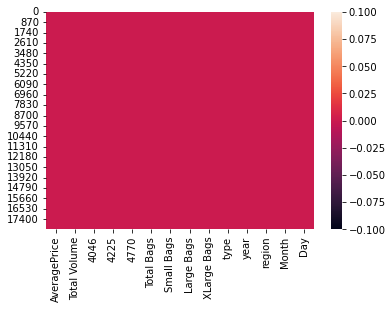

In [69]:
# Let's visualize the null values clearly
sns.heatmap(df.isnull())

Now we can clearly see that there is no null values present in the dataset

In [70]:
# Checking how many columns are there in the dataset
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'Month', 'Day'],
      dtype='object')

In [71]:
# Checking the uniqueness of target variable
df['AveragePrice'].unique()

array([1.33, 1.35, 0.93, 1.08, 1.28, 1.26, 0.99, 0.98, 1.02, 1.07, 1.12,
       1.31, 1.11, 1.34, 1.45, 1.05, 1.37, 1.27, 1.32, 1.23, 1.19, 1.43,
       1.2 , 1.22, 1.13, 1.16, 1.06, 1.17, 1.24, 0.96, 1.  , 1.09, 0.95,
       0.97, 1.15, 1.01, 1.14, 1.1 , 1.04, 1.03, 1.18, 1.29, 1.25, 0.71,
       0.94, 0.91, 1.39, 1.4 , 1.36, 1.3 , 1.54, 1.59, 1.56, 1.38, 1.49,
       1.5 , 1.47, 1.42, 1.41, 1.44, 1.52, 0.9 , 0.87, 0.78, 0.92, 0.83,
       0.88, 0.84, 0.85, 1.21, 0.79, 0.89, 0.86, 0.8 , 0.82, 0.74, 0.81,
       0.77, 0.75, 0.65, 0.73, 0.68, 0.72, 0.67, 0.76, 0.62, 0.7 , 0.66,
       1.46, 0.49, 0.53, 0.56, 0.6 , 0.58, 0.54, 0.52, 0.51, 0.57, 0.63,
       0.64, 0.61, 1.48, 1.55, 1.58, 1.53, 1.57, 1.51, 0.69, 1.62, 1.63,
       1.61, 1.6 , 1.73, 1.8 , 1.86, 1.85, 1.69, 1.66, 1.65, 1.64, 1.67,
       1.68, 1.82, 2.07, 1.84, 1.83, 1.7 , 1.72, 1.81, 1.78, 0.59, 1.9 ,
       1.93, 1.99, 1.95, 1.89, 1.76, 1.71, 1.74, 0.55, 1.79, 1.75, 1.94,
       2.2 , 1.87, 1.77, 2.06, 2.11, 2.22, 2.14, 2.

In [72]:
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [73]:
# List of values in the target variable
df["AveragePrice"].value_counts()

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64

# Stastical Description of the DataSet

In [27]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821,6.362558,15.253790
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324,3.472146,8.965902
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000,3.000000,7.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000,6.000000,15.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000,9.000000,22.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000,12.000000,31.000000


This gives the statistical information of the dataset. The summary of this dataset looks perfect since there is no negative/ invalid values present.

From the above description we can observe the following things.

The counts of all the columns are same which means there are no null values present in the daaset. The label Average Price has mean which is bit greater than median, means it is skewed to right. The minimum price of the single fruit avocado is 0.44 dollars(say), max is 3.25 and mean is 1.04. The mean and the median(50%) are very close to each other in most of the columns like 4225(Total number of avocados with PLU 4225), year, Month, Day which means the data is symmetrical (normal) in these columns. The mean is greater than the median in most of the columns which means they are skewed to right. In some of the columns median is greater than the mean, hence they are skewed to left. Most of the columns have nearly zero statistics also the mean and the standard deviation are very close to each other. By looking at the difference between max and 75% (3rd quantile), we can infer there are outliers present in most of the column. We will remove this outliers in further steps. Before visualizing the data let's separate the categorical and numerical columns.

In [74]:
# checking for categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['type', 'region']


hese are the categorical columns that we have, will encode these columns using either label encoder or one hot encoder.

In [29]:
# Now checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'Month', 'Day']


# Data Visualization

# Univariate Analysis

conventional    9126
organic         9123
Name: type, dtype: int64


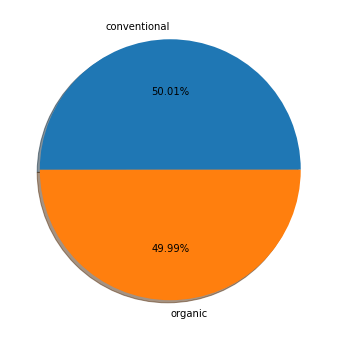

In [75]:
#Visualize the count of type of the avocado
print(df["type"].value_counts())
labels='conventional','organic'
fig, ax = plt.subplots(figsize=(10,6))
ax.pie(df['type'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


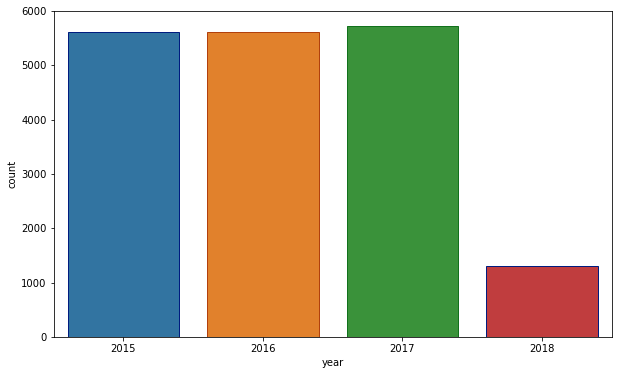

In [76]:
#Visualize the count of year
print(df["year"].value_counts())
plt.figure(figsize=(10,6))

sns.countplot(df["year"],edgecolor=sns.color_palette("dark", 3))
plt.show()

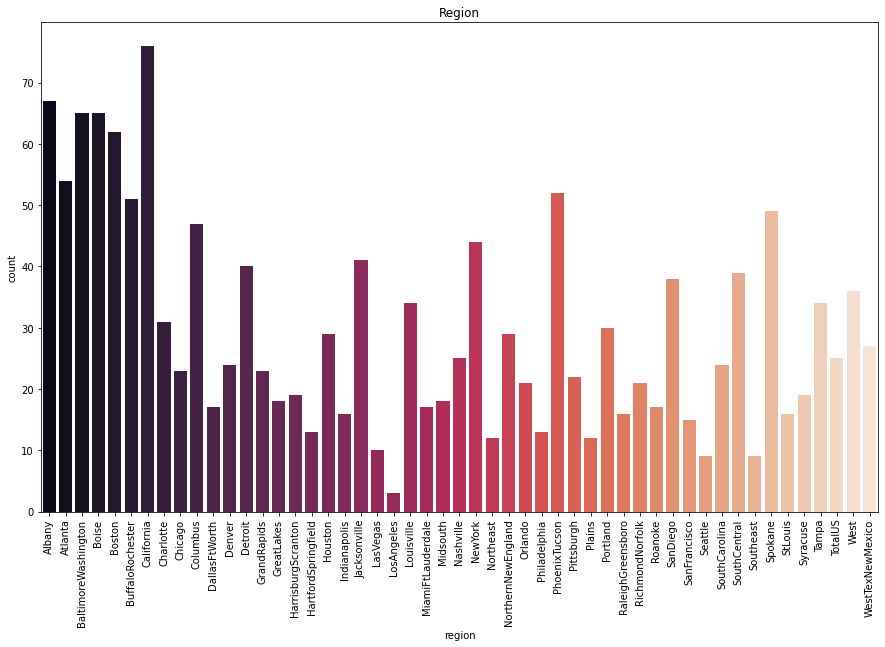

In [32]:
#Visualize the count of year
plt.figure(figsize=(15,9))
sns.countplot(df["region"],palette="rocket")
plt.title("Region")
plt.xticks(rotation=90)
plt.show()

We can observe the count of avocado is higher for california,LosAngles has lowest count.

# Checking the distribution of the dataset

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64


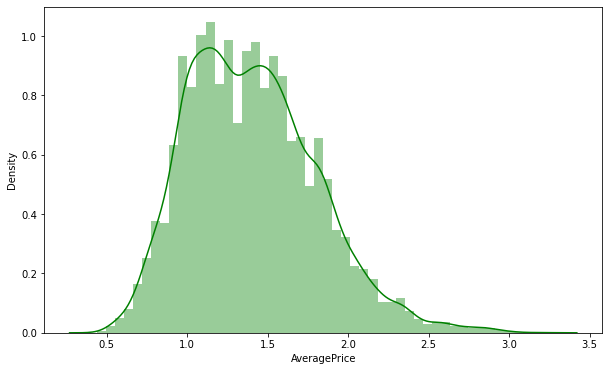

In [77]:
# Distribution plot for target variable "AveragePrice"
print(df["AveragePrice"].value_counts())
plt.figure(figsize=(10,6))
sns.distplot(df["AveragePrice"], color="g")
plt.show()

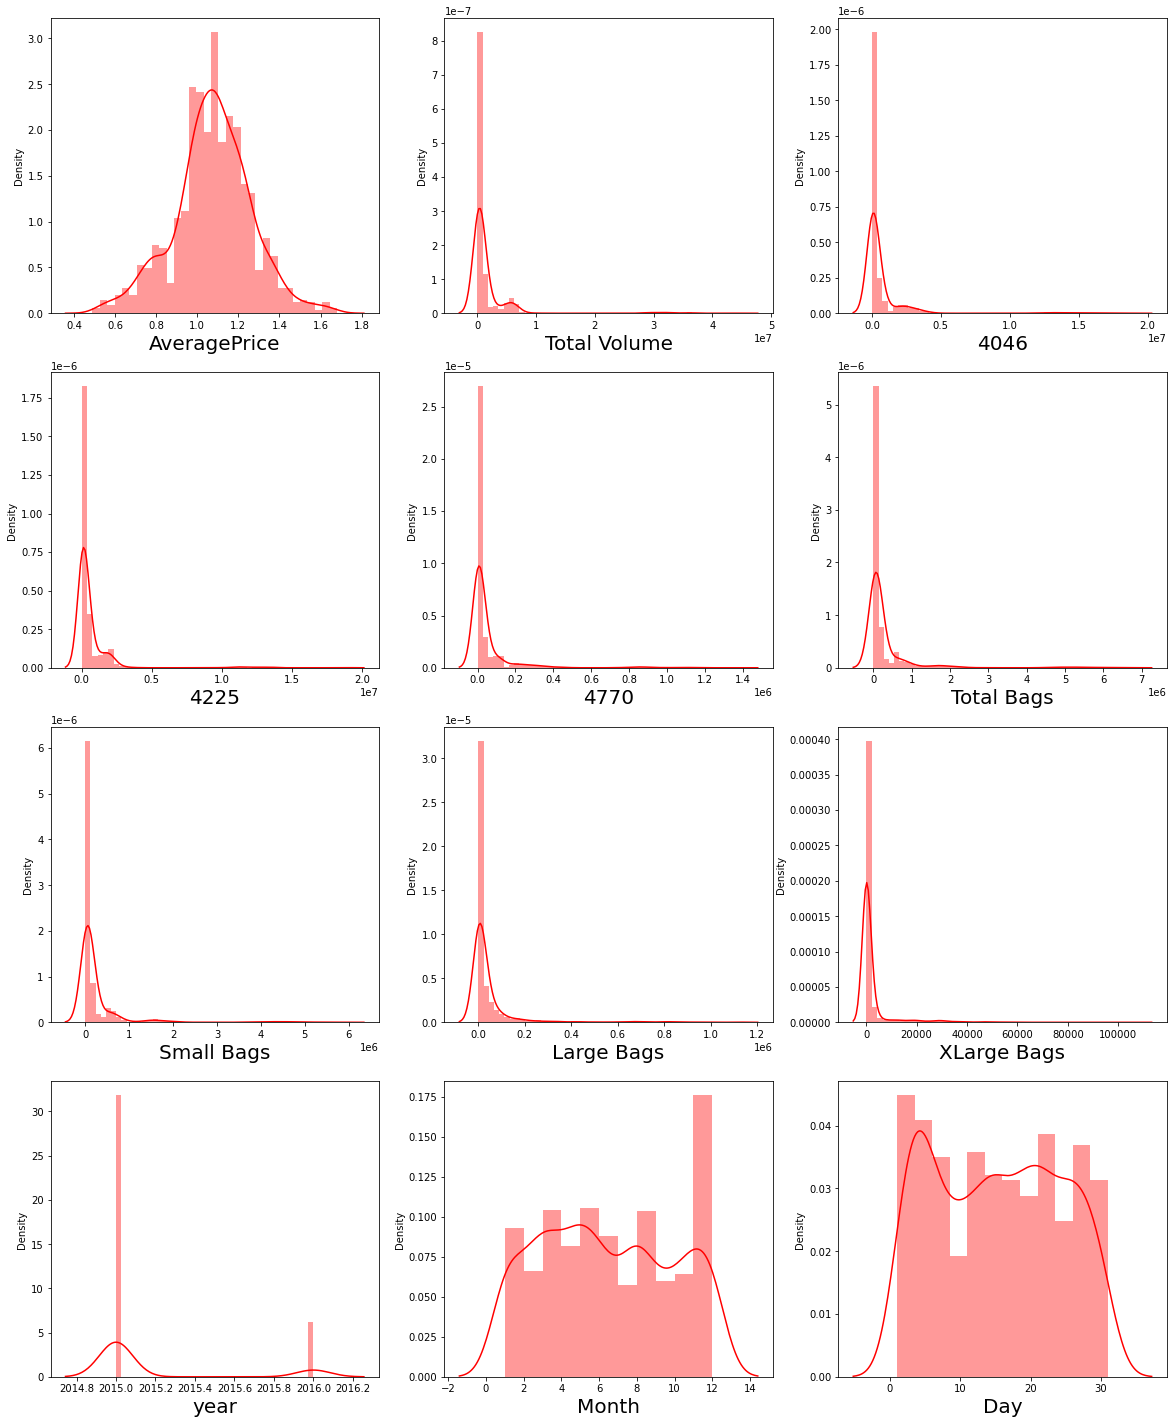

In [34]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=14:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(df[column],color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

From the above distplots we can observe that none of the columns are normally distributed but AveragePrice.

Also the columns contains huge skewness most of them are skewed to left, which means median is more than the mean in these columns. So will remove these skewness later

# Bivariate Analysis

Text(0, 0.5, 'AveragePrice')

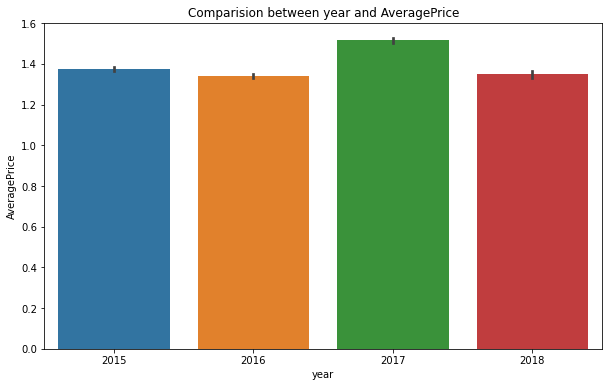

In [78]:
# Checking which year has maximum AveragePrice
plt.figure(figsize=[10,6])
plt.title('Comparision between year and AveragePrice')
sns.barplot(df['year'],df['AveragePrice'], data=df);
plt.xlabel("year")
plt.ylabel("AveragePrice")

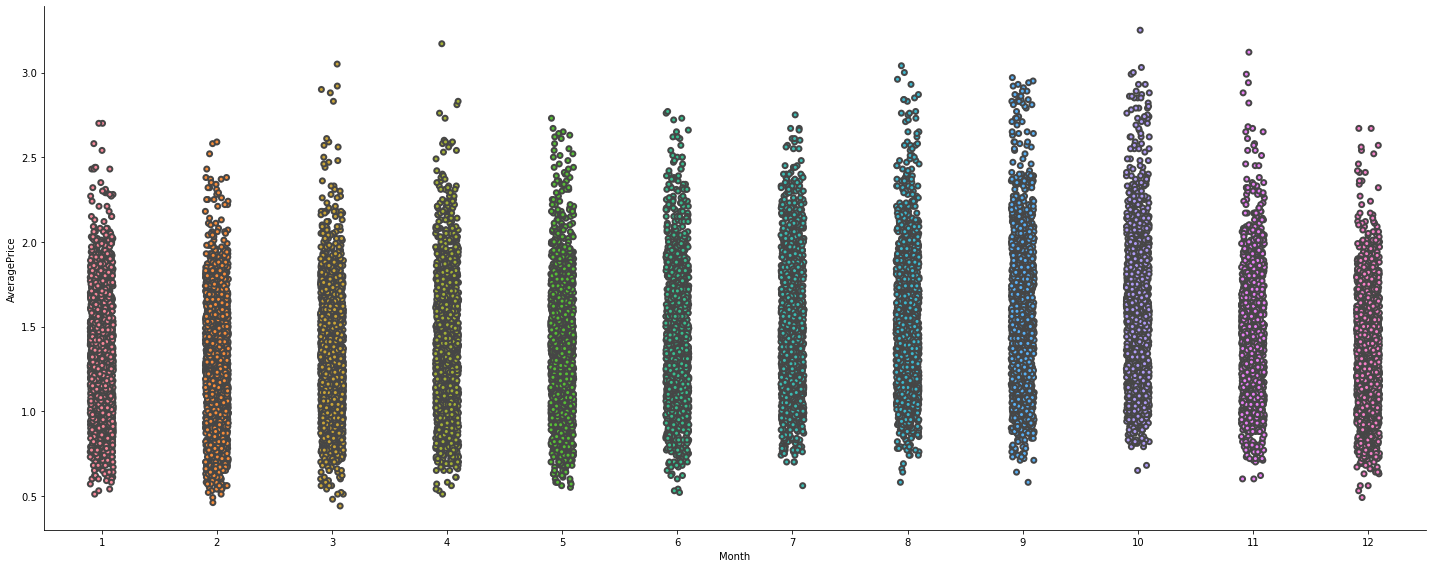

In [79]:
sns.catplot(x = "Month", y = "AveragePrice", kind="strip",data=df,height=8, linewidth=2, aspect=2.5)

Based on plot we can observe the Average Price remains high during June and october (6th  and 10th month), starts to drop from November onwards. Also the price of avocado is less in the months of Jan to may and again there is an increment of price of avocado in the month June

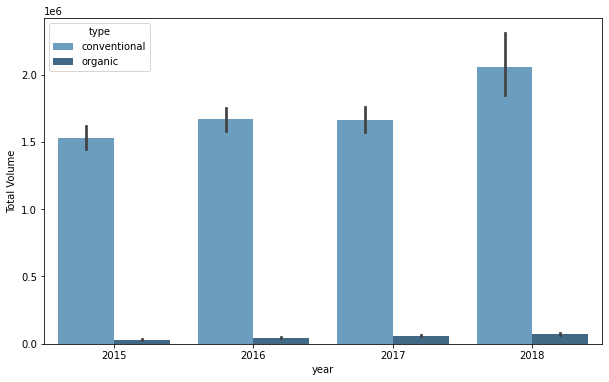

In [80]:
plt.figure(figsize=(10,6))
sns.barplot(x='year',y='Total Volume',hue="type",data=df,palette="Blues_d",ci=68)
plt.show()

Conventional types were sold higher every year with low price than Organic types which means the demand for conventional is high. Also The Total sales volume is spotted highest in the year 2018 and then declined in 2015. The total sales are same in the year 2016 and 2017.

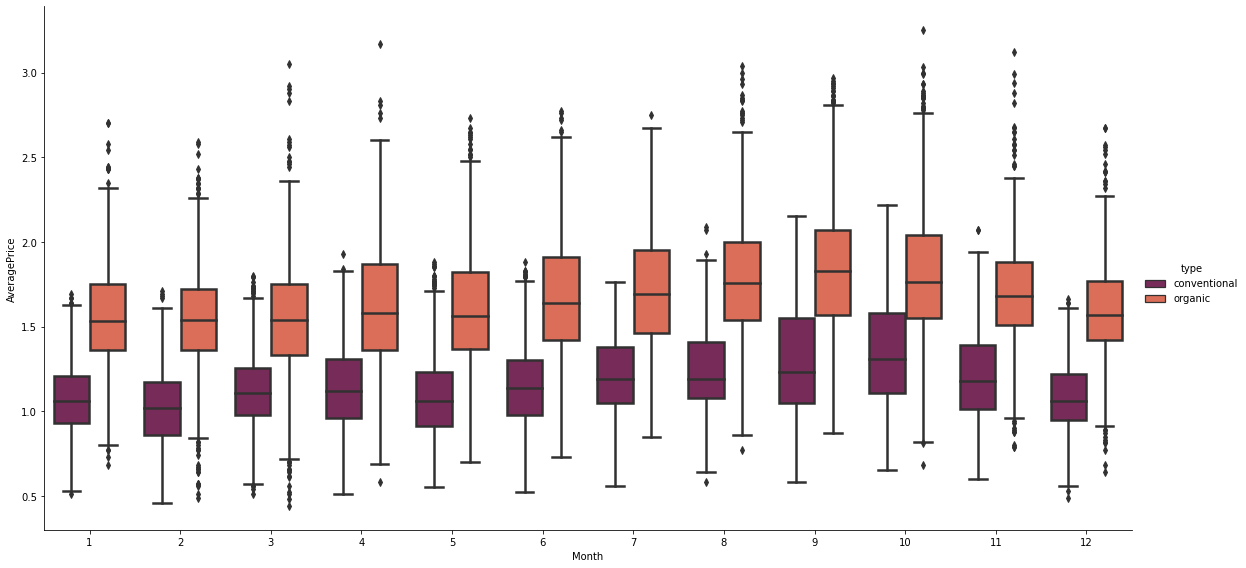

In [81]:
sns.catplot(x="Month", y="AveragePrice", hue="type", 
            kind="box", data=df, height=8, linewidth=2.5, aspect=2,palette="rocket");

Here we can notice that the AveragePrice of organic avocado fruit is more than the conventional type. As we can observe the AveragePrice of both type of avocados is high in the months August, September and October and it pulled down in November. Also the price is high in April and March.



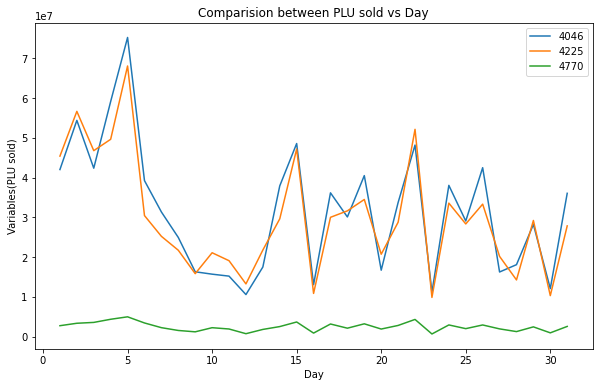

In [42]:
variables = df[['4046', '4225', '4770']].groupby(df.Day).sum()
variables.plot(kind='line', fontsize=10,figsize=(10,6))
plt.title("Comparision between PLU sold vs Day")
plt.xlabel("Day")
plt.ylabel("Variables(PLU sold)")
plt.show()

From the line plot we can observe how the total number of avocados with PLU 4046, PLU 4225 and PLU 4770 are sold in each day starting from day 1 to day 31. We can notice very few avocados with 4046 was sold in all the day and the avocados with PLU 4225 and PLU 4770 was sold all time high.

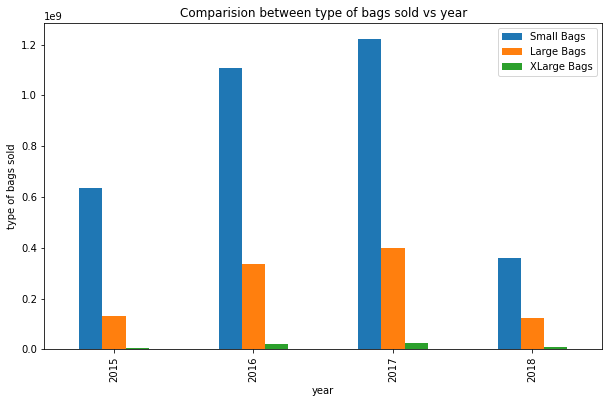

In [82]:
feature = df[["Small Bags","Large Bags","XLarge Bags"]].groupby(df.year).sum()
feature.plot(kind='bar', fontsize=10,figsize=(10,6))
plt.title("Comparision between type of bags sold vs year")
plt.xlabel("year")
plt.ylabel("type of bags sold")
plt.show()

Small bag size was sold all time highest where Xlarge Bag size was least sold.

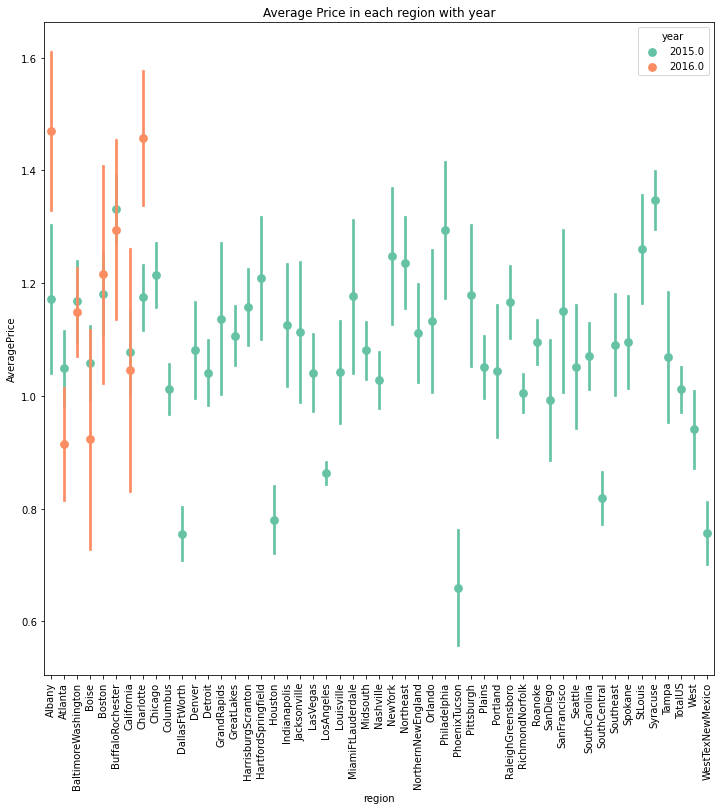

In [44]:
plt.figure(figsize=(12,12))
plt.title("Average Price in each region with year")
sns.pointplot(x='region',y='AveragePrice',data=df, hue='year',join=False,palette="Set2",ci="sd")
plt.xticks(rotation=90)
plt.show()

The average price of the avocado is high in the region albany followed by california in the year 2016. The demand of the fruit is high more number of cities for the year 2015 

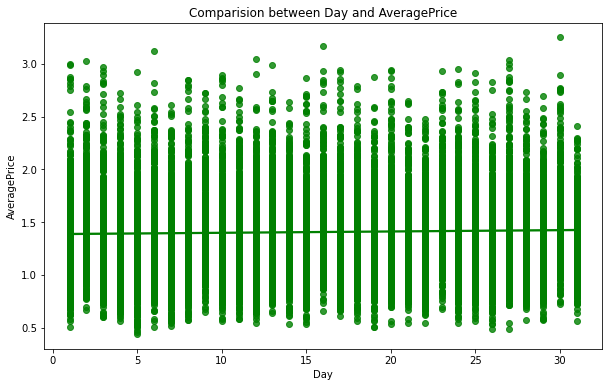

In [83]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Day and AveragePrice')
sns.regplot(df['Day'],df['AveragePrice'],color="g");
plt.show()

The average price of the avocado is high in almost all the days except on 7th, 14th and 22nd day of the month.

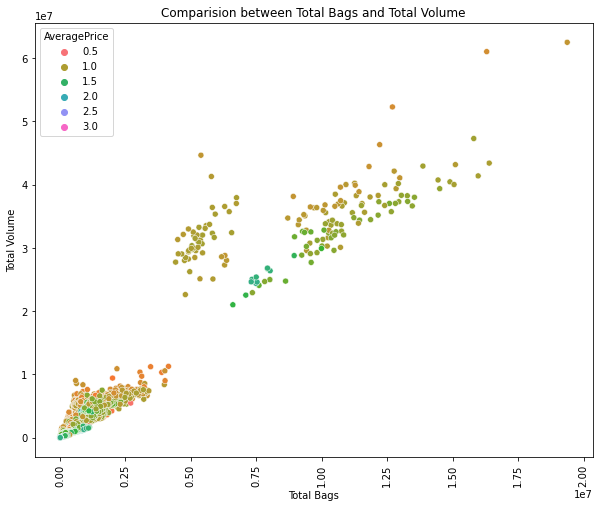

In [84]:
plt.figure(figsize=(10,8))
plt.title("Comparision between Total Bags and Total Volume")
sns.scatterplot(x='Total Bags',y='Total Volume',hue="AveragePrice",data=df,palette="husl")
plt.xticks(rotation=90)
plt.show()

There is a linear relationship between the features. As the total bags sales increases with total volume, the average price of the avocado also increases.

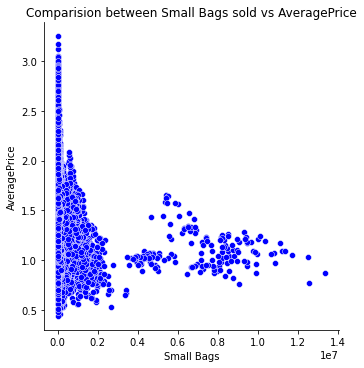

In [85]:
sns.relplot(df['Small Bags'],df['AveragePrice'],color="b");
plt.title("Comparision between Small Bags sold vs AveragePrice")
plt.xlabel("Small Bags")
plt.ylabel("AveragePrice")
plt.show()

The Small Bags size has high average price at first and also from the range 0-0.6, the price of small bag type is almost 1.6.

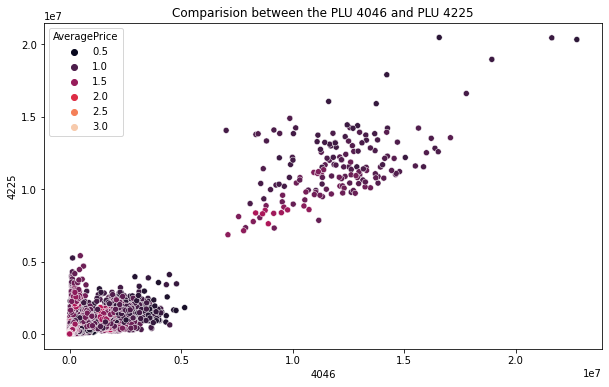

In [86]:
plt.figure(figsize=(10,6))
plt.title("Comparision between the PLU 4046 and PLU 4225")
sns.scatterplot(df["4046"],df["4225"],hue=df["AveragePrice"],palette="rocket")
plt.show()

There is a linear relationship between the total number of avocados with PLU 4046 and PLU 4225 sold. The number of avocados with PLU 4046 and PLU 4225 sold increases, the average price also increases as shown in the graph. These scatter plots can also be observed in the pairplot.

# Identifying the outliers

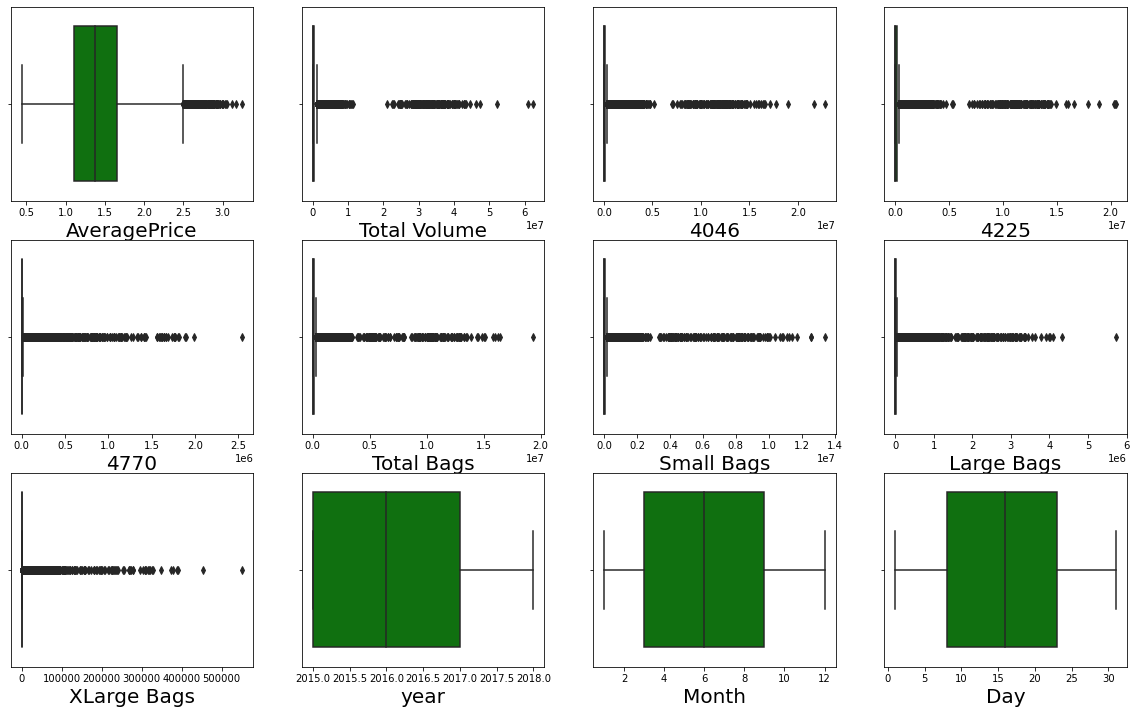

In [87]:
numerical_col=['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year','Month', 'Day']
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=18:
        ax = plt.subplot(6,4,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()


The outliers present in all the columns except year, Month and Day. Let's remove the outliers using Zscore method. Even AveragePrice has outliers, since it is our target variable I will keep it untouched.

# Removing outliers

ZScore Method

In [88]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'Month', 'Day'],
      dtype='object')

In [89]:
# Features containing outliers
features = df[['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']]

In [90]:
# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(features))

z

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,0.227716,0.230816,0.199902,0.212091,0.234170,0.232647,0.222352,0.17558
1,0.230427,0.231103,0.208054,0.211997,0.233350,0.231568,0.222335,0.17558
2,0.212085,0.231007,0.154478,0.211325,0.234730,0.233399,0.222311,0.17558
3,0.223444,0.230741,0.185350,0.211864,0.237096,0.236568,0.222186,0.17558
4,0.231538,0.230891,0.208719,0.211834,0.236718,0.236154,0.221924,0.17558
...,...,...,...,...,...,...,...,...
18244,0.241373,0.230017,0.243857,0.212540,0.229301,0.226665,0.220964,0.17558
18245,0.242296,0.230693,0.242277,0.212540,0.233594,0.232196,0.221403,0.17558
18246,0.242331,0.230693,0.243090,0.205766,0.233463,0.231644,0.222561,0.17558
18247,0.241625,0.230428,0.242651,0.205774,0.231866,0.229543,0.222529,0.17558


In [91]:
# Creating new dataframe
new_df = df[(z<3).all(axis=1)] 
new_df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,14


In [92]:
# Shape of original dataset
df.shape

(18249, 14)

In [93]:
# Shape of new dataframe
new_df.shape

(17782, 14)

# check for skewness

In [94]:
# Checking the skewness
new_df.skew()

AveragePrice    0.560969
Total Volume    3.782060
4046            4.928850
4225            4.472729
4770            5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

Removing skewness using yeo-johnson method

In [95]:
# Removing skewness using yeo-johnson method to get better prediction
features = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']


scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [96]:
new_df[features] = scaler.fit_transform(new_df[features].values)
new_df[features].head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-0.675702
1,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-0.675702
2,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-0.675702
3,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-0.675702
4,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-0.675702


In [97]:
new_df.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.860603
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

In [98]:
# Removing skewness using log transformation
new_df["XLarge Bags"] = np.log1p(new_df["XLarge Bags"])

In [99]:
#checking the 
new_df.skew()


AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.791499
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

Now the skewness has been removed

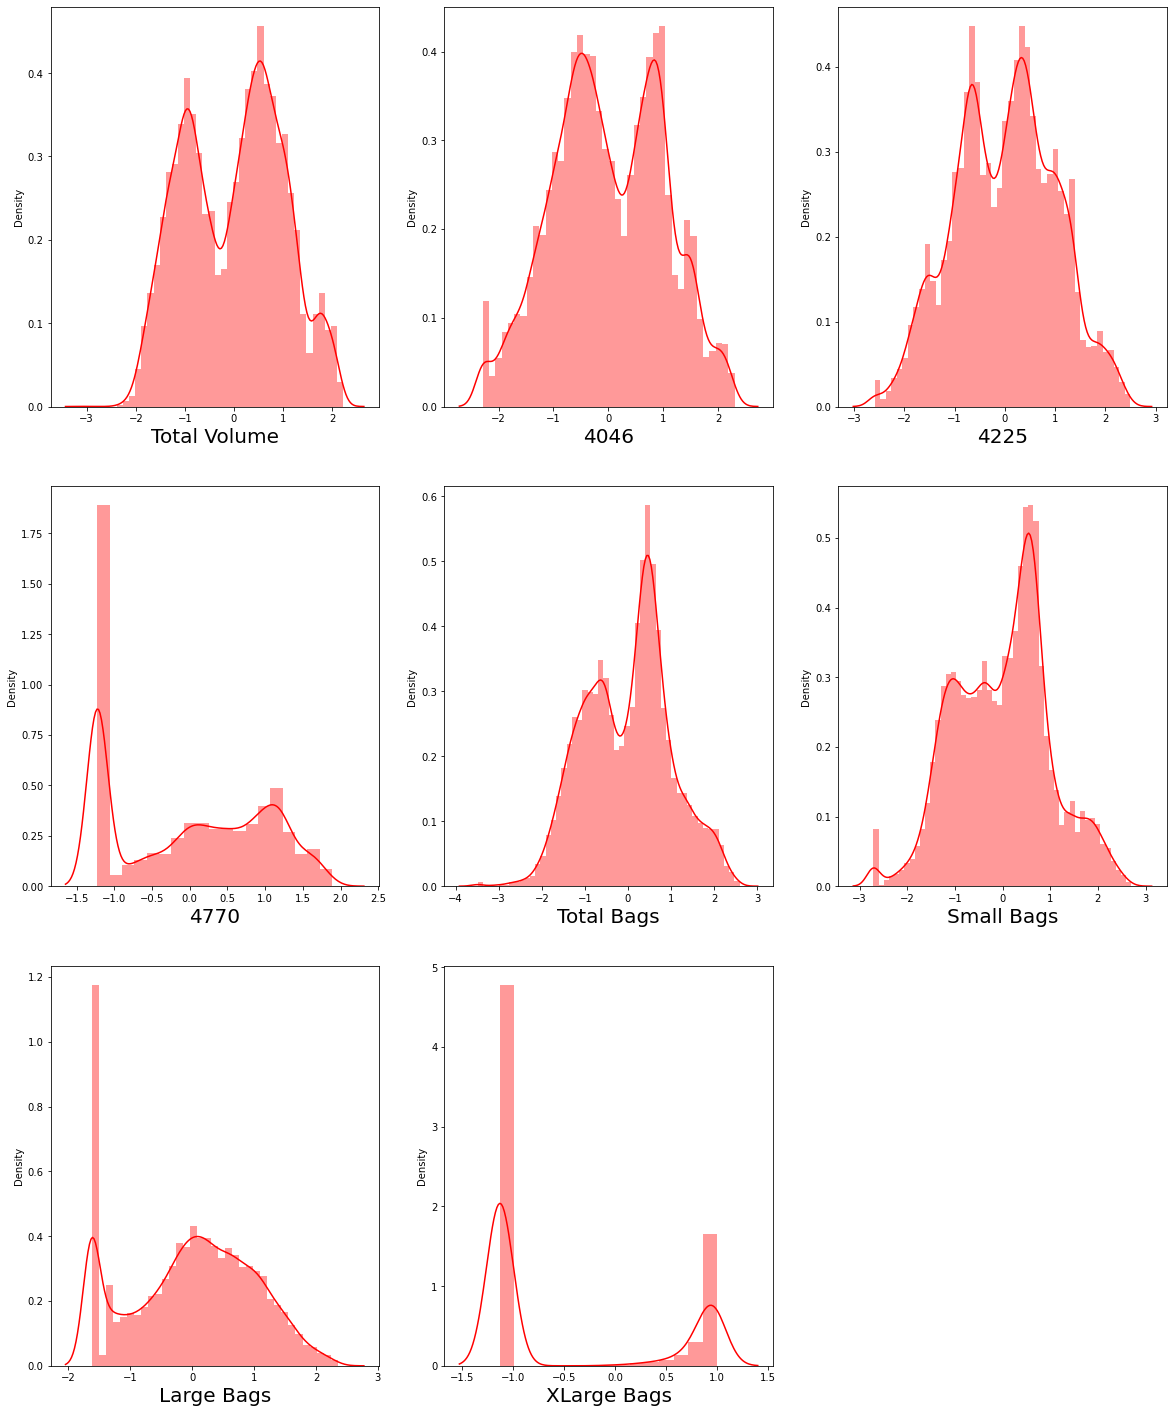

In [100]:
# After removing let's check how the data has been distributed in each column.

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in new_df[features]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(new_df[column],color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

The data looks almost normal compare to previous data and the skewness is also removed.

# Encoding for the categorical data using Label Encoder

In [101]:
categorical_col = ["type","region"]

In [102]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_df[categorical_col]= new_df[categorical_col].apply(LE.fit_transform)

In [103]:
new_df[categorical_col]

,type,region
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
18244,1,53
18245,1,53
18246,1,53
18247,1,53


I have encoded the data using label encoding.

# Correlation between the target variable and independent variables using HEAT map

In [104]:
# Checking the correlation between features and the target
cor = new_df.corr()
cor

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
AveragePrice,1.000000,-0.576829,-0.548618,-0.448579,-0.491320,-0.564616,-0.493621,-0.477879,-0.392262,0.608447,0.099910,0.010428,0.157900,0.024742
Total Volume,-0.576829,1.000000,0.889083,0.924160,0.818568,0.939776,0.905098,0.681427,0.629752,-0.800828,0.076584,0.065709,-0.026332,-0.006248
4046,-0.548618,0.889083,1.000000,0.764679,0.736523,0.799354,0.778765,0.601899,0.575152,-0.725826,-0.002396,0.159390,-0.025919,-0.004558
4225,-0.448579,0.924160,0.764679,1.000000,0.796799,0.818511,0.784901,0.614878,0.583293,-0.747722,-0.004533,0.032273,-0.024708,-0.005919
4770,-0.491320,0.818568,0.736523,0.796799,1.000000,0.761641,0.754305,0.548457,0.617192,-0.780988,-0.051657,0.037805,-0.017377,0.001383
Total Bags,-0.564616,0.939776,0.799354,0.818511,0.761641,1.000000,0.949901,0.729652,0.612530,-0.725686,0.210924,0.065996,-0.014571,-0.003703
Small Bags,-0.493621,0.905098,0.778765,0.784901,0.754305,0.949901,1.000000,0.566307,0.601404,-0.720466,0.185955,0.051985,-0.010260,-0.000535
Large Bags,-0.477879,0.681427,0.601899,0.614878,0.548457,0.729652,0.566307,1.000000,0.451796,-0.500026,0.190295,0.086573,-0.016942,-0.000876
XLarge Bags,-0.392262,0.629752,0.575152,0.583293,0.617192,0.612530,0.601404,0.451796,1.000000,-0.672461,0.156202,-0.017598,0.020885,0.010991
type,0.608447,-0.800828,-0.725826,-0.747722,-0.780988,-0.725686,-0.720466,-0.500026,-0.672461,1.000000,0.007399,0.021970,-0.005044,-0.002469


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]),
 [Text(0, 0.5, 'AveragePrice'),
  Text(0, 1.5, 'Total Volume'),
  Text(0, 2.5, '4046'),
  Text(0, 3.5, '4225'),
  Text(0, 4.5, '4770'),
  Text(0, 5.5, 'Total Bags'),
  Text(0, 6.5, 'Small Bags'),
  Text(0, 7.5, 'Large Bags'),
  Text(0, 8.5, 'XLarge Bags'),
  Text(0, 9.5, 'type'),
  Text(0, 10.5, 'year'),
  Text(0, 11.5, 'region'),
  Text(0, 12.5, 'Month'),
  Text(0, 13.5, 'Day')])

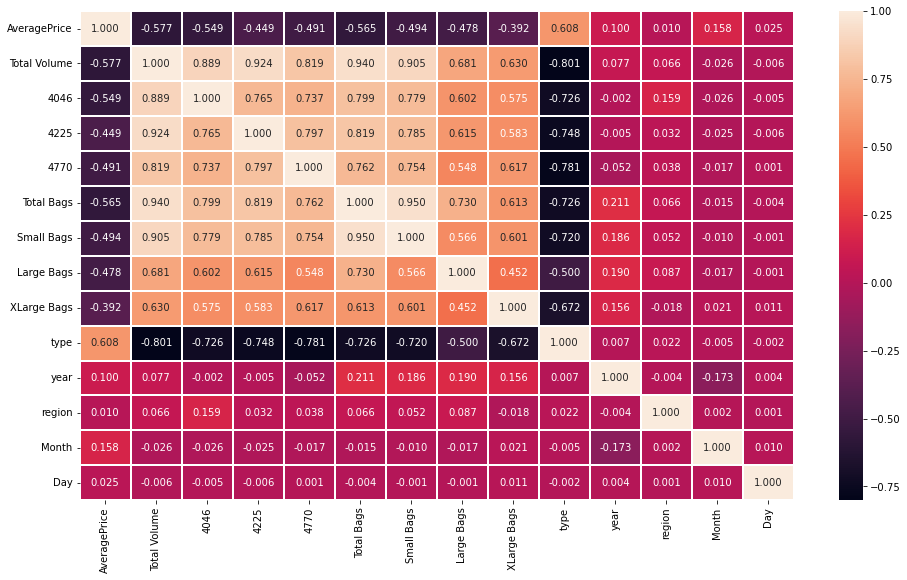

In [105]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(16,9))
sns.heatmap(new_df.corr(),linewidths=.1,fmt='0.3f', annot = True)
plt.yticks(rotation=0)

This heatmap shows the correlation matrix by visualizing the data. we can observe the relation between one feature to other.

This heat map contains both positive and negative correlation.

Almost all the features are highly negatively correlated with the target variable and few columns year, Month and type have positive correlation with the target. The features Day and region have no relation with the target so we can drop these columns. Almost all the features are correlated with each other which leads to multicollinearity problem. We will solve this problem by VIF value. Also most of the columns have no relation with each other and have zero correlation.

In [106]:
cor['AveragePrice'].sort_values(ascending=False)

AveragePrice    1.000000
type            0.608447
Month           0.157900
year            0.099910
Day             0.024742
region          0.010428
XLarge Bags    -0.392262
4225           -0.448579
Large Bags     -0.477879
4770           -0.491320
Small Bags     -0.493621
4046           -0.548618
Total Bags     -0.564616
Total Volume   -0.576829
Name: AveragePrice, dtype: float64

# Visualizing the correlation between label and features using bar plot

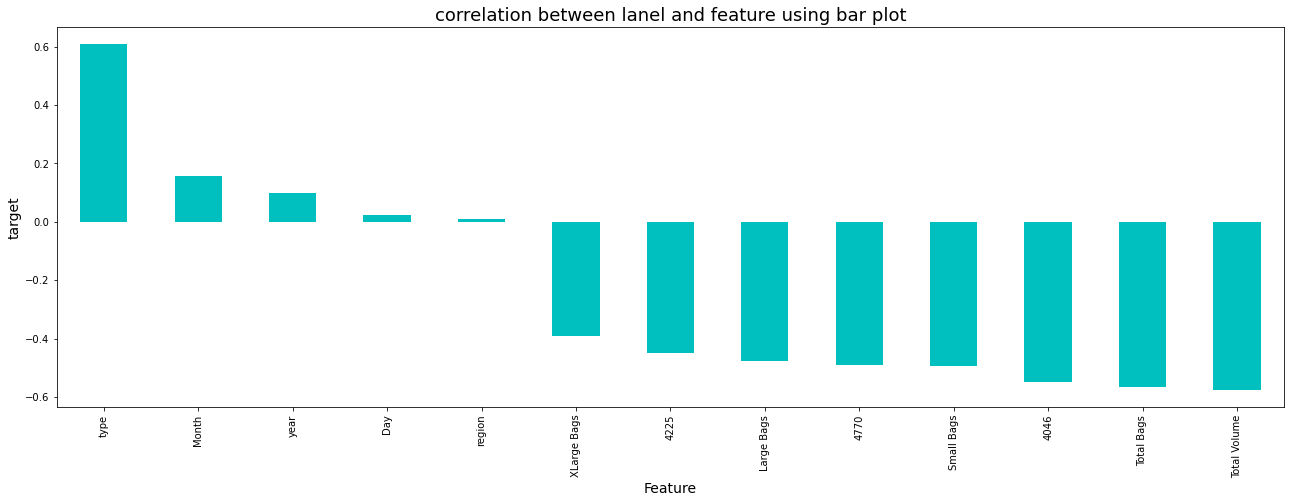

In [107]:
plt.figure(figsize=(22,7))
new_df.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('target',fontsize=14)
plt.title('correlation between lanel and feature using bar plot',fontsize=18)
plt.show()

In [108]:
new_df.drop("Day",axis=1, inplace=True)


# Separating the features and label variables into x and y

In [109]:
x = new_df.drop("AveragePrice",axis=1)
y = new_df["AveragePrice"]

In [110]:
x.shape

(17782, 12)

In [111]:
y.shape

(17782,)

In [112]:
x.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-1.126094,0,2015,0,12
1,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-1.126094,0,2015,0,12
2,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-1.126094,0,2015,0,12
3,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-1.126094,0,2015,0,12
4,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-1.126094,0,2015,0,11


# Standard Scalarization

In [113]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-0.685946,-1.026443,-1.214908,-1.698613,1.641434
1,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-0.685946,-1.026443,-1.214908,-1.698613,1.641434
2,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-0.685946,-1.026443,-1.214908,-1.698613,1.641434
3,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-0.685946,-1.026443,-1.214908,-1.698613,1.641434
4,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-0.685946,-1.026443,-1.214908,-1.698613,1.358706
...,...,...,...,...,...,...,...,...,...,...,...,...
17777,-0.668931,-0.454078,-0.922232,-1.224990,-0.331042,-0.165765,-0.405895,-0.685946,0.974238,1.979143,1.742552,-1.185845
17778,-0.762380,-0.610403,-0.665649,-1.224990,-0.499550,-0.321645,-0.478556,-0.685946,0.974238,1.979143,1.742552,-1.468572
17779,-0.766344,-0.610350,-0.774395,0.455355,-0.493424,-0.303466,-0.945246,-0.685946,0.974238,1.979143,1.742552,-1.468572
17780,-0.692595,-0.539211,-0.711605,0.455045,-0.424475,-0.240252,-0.910471,-0.685946,0.974238,1.979143,1.742552,-1.468572


# Checking VIF values to solve multicollinearity

In [114]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,52.131276,Total Volume
1,7.153485,4046
2,11.169168,4225
3,3.952857,4770
4,34.509723,Total Bags
5,16.635346,Small Bags
6,3.462946,Large Bags
7,2.071298,XLarge Bags
8,3.757728,type
9,1.386245,year


The VIF value is more than 10 in the features Total Volume, 4225, Total Bags, Small Bags and Large Bags. First I will remove the column having high VIF value and will check the VIF again, if the value retains more than 10 then I will drop the specific column again.

In [115]:
# Dropping the feature Total Volume
x.drop("Total Volume",axis=1, inplace=True)

In [116]:
# Againing checking the VIF after removing one column

vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,3.742061,4046
1,4.283636,4225
2,3.938377,4770
3,24.480097,Total Bags
4,16.635006,Small Bags
5,3.420844,Large Bags
6,2.058386,XLarge Bags
7,3.540936,type
8,1.383804,year
9,1.078624,region


The multocollinearity problem still exists so let's drop the feature Total Bags which has VIF value more than 10.

In [117]:
# Dropping the column Total Bags
x.drop("Total Bags",axis=1, inplace=True)

In [118]:
# Checking VIF again
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,3.723365,4046
1,4.138882,4225
2,3.938119,4770
3,4.101853,Small Bags
4,1.866013,Large Bags
5,2.058144,XLarge Bags
6,3.537713,type
7,1.359335,year
8,1.078618,region
9,1.051469,Month


The VIF value is less than 10 in all the features which means we have solved the multicollinearity problem. Now we can move to model building.

# Modeling

Finding best random state

In [119]:
from sklearn.neighbors import KNeighborsRegressor as KNN
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = KNN()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.8740110605968504  on Random_state  49


Getting an r2 score of 87% at a random state of 49

In [120]:
## Creating train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

# Linear Regression

In [121]:
# Checking r2score for Linear Regression
LR = LinearRegression()
LR.fit(x_train,y_train)

# prediction
predLR=LR.predict(x_test)
print('R2_score:',r2_score(y_test,predLR))
print('MAE:',metrics.mean_absolute_error(y_test, predLR))
print('MSE:',metrics.mean_squared_error(y_test, predLR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predLR)))

# Checking cv score for Linear Regression
print("Cross_Validaton_Score",cross_val_score(LR,x,y,cv=5).mean())

R2_score: 0.5147008353742311
MAE: 0.21816149914963648
MSE: 0.08004250882857523
RMSE: 0.28291784819727306
Cross_Validaton_Score 0.08855676789690126


# Random Forest Regressor

In [122]:
# Checking R2 score for  Random Forest Regressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)

# prediction
pred_RFR=RFR.predict(x_test)
print('R2_Score:',r2_score(y_test,pred_RFR))

# Mean Absolute Error (MAE)
print('MAE:',metrics.mean_absolute_error(y_test, pred_RFR))

# Mean Squared Error (MSE)
print('MSE:',metrics.mean_squared_error(y_test, pred_RFR))

# Root Mean Squared Error (RMSE)
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_RFR)))

# Checking cv score for Random Forest Regression
print("Cross_Validaton_Score",cross_val_score(RFR,x,y,cv=5).mean())

R2_Score: 0.8864298835757365
MAE: 0.096180412371134
MSE: 0.018731614865979383
RMSE: 0.1368634898940524
Cross_Validaton_Score 0.2220768389177862


# KNeighbors Regressor

In [123]:
# Checking R2 score for KNN Regressor
knn=KNN()
knn.fit(x_train,y_train)

# prediction
predknn=knn.predict(x_test)
print('R2_Score:',r2_score(y_test,predknn))
print('MAE:',metrics.mean_absolute_error(y_test, predknn))
print('MSE:',metrics.mean_squared_error(y_test, predknn))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predknn)))

# Checking cv score for KNN
print("Cross_Validaton_Score",cross_val_score(knn,x,y,cv=5).mean())

R2_Score: 0.8740110605968504
MAE: 0.10129147141518277
MSE: 0.020779905529522025
RMSE: 0.14415236914293855
Cross_Validaton_Score -0.01811860375811707


# GradientBoosting Regressor

In [124]:
# Checking R2 score for  GradientBoosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
GB=GradientBoostingRegressor()
GB.fit(x_train,y_train)

# prediction
predGB=GB.predict(x_test)
print('R2_Score:',metrics.r2_score(y_test,predGB))
print('MAE:',metrics.mean_absolute_error(y_test, predGB))
print('MSE:',metrics.mean_squared_error(y_test, predGB))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predGB)))

# Checking cv score for GradientBoosting Regressor
print("Cross_Validaton_Score",cross_val_score(GB,x,y,cv=5).mean())

R2_Score: 0.7398410741912826
MAE: 0.1560348189094327
MSE: 0.04290914683921793
RMSE: 0.20714523127317688
Cross_Validaton_Score 0.3872549815569012


# Support Vector Machine Regressor

In [125]:
# Checking R2 score for Support Vector Machine Regressor
svr=SVR()
svr.fit(x_train,y_train)

# prediction
predsvr=svr.predict(x_test)
print('R2_Score:',r2_score(y_test,predsvr))
print('MAE:',metrics.mean_absolute_error(y_test, predsvr))
print('MSE:',metrics.mean_squared_error(y_test, predsvr))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predsvr)))

# Checking cv score for SVR 
print("Cross_Validaton_Score",cross_val_score(svr,x,y,cv=5).mean())

R2_Score: 0.7960770496780594
MAE: 0.13423720339992695
MSE: 0.03363390201604797
RMSE: 0.18339547981356566
Cross_Validaton_Score 0.007958673353281421


By checking the difference between model accuracy and cross validation score it is found that Random forest regressor as best model.

# Hyperparameter Tuning

In [126]:
parameter = {'n_neighbors':[1,2,3,4],
            'weights':['uniform','distance'],
            'algorithm':['auto','ball_tree','kd_tree','brute'],
            'n_jobs':[10,20,30,40]}

In [127]:
GCV=GridSearchCV(KNN(),parameter,cv=5)

In [128]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_jobs': [10, 20, 30, 40],
                         'n_neighbors': [1, 2, 3, 4],
                         'weights': ['uniform', 'distance']})

In [130]:
GCV.best_params_

{'algorithm': 'auto', 'n_jobs': 10, 'n_neighbors': 3, 'weights': 'distance'}

In [131]:
Final_mod=KNN(algorithm='brute',n_jobs=10,n_neighbors=3,weights='distance')
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2_Score: 89.2469186456753
mean_squared_error: 0.017735526289266144
mean_absolute_error: 0.08947110954068643
RMSE value: 0.1331747959985903


# Saving the Model

In [132]:
# Saving the model using .pkl
import joblib
joblib.dump(Final_mod,"Avocado.pkl")

['Avocado.pkl']

# Predicting the saved model

In [133]:
# Let's load the saved model and get the prediction

# Loading the saved model
model=joblib.load("Avocado.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([1.24630986, 1.83252583, 1.80393428, ..., 1.5860901 , 1.44745067,
       1.33434882])

In [134]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,...,5325,5326,5327,5328,5329,5330,5331,5332,5333,5334
Predicted,1.24631,1.832526,1.803934,0.99866,1.195949,1.265875,1.202933,1.559202,1.478156,0.909845,...,1.210196,1.55774,1.803169,1.997506,1.499516,1.742397,0.728708,1.58609,1.447451,1.334349
Original,1.19000,1.880000,1.820000,1.04000,1.100000,1.280000,1.020000,1.350000,1.410000,0.860000,...,0.910000,1.56000,1.730000,2.310000,1.470000,1.660000,0.700000,1.54000,1.600000,1.410000


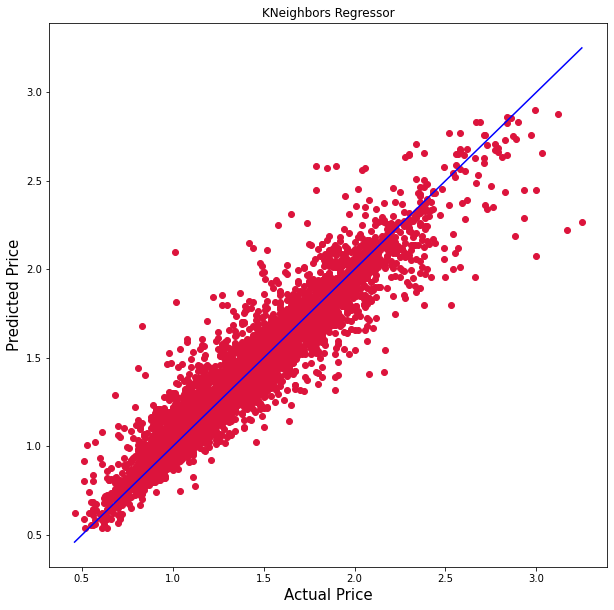

In [136]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, prediction, c='crimson')
plt1 = max(max(prediction), max(y_test))
plt2 = min(min(prediction), min(y_test))
plt.plot([plt1, plt2], [plt1, plt2], 'b-')
plt.title("KNeighbors Regressor")
plt.xlabel('Actual Price', fontsize=15)
plt.ylabel('Predicted Price', fontsize=15)
plt.show()

The blue line represents the actual Average Price of the avocado and scattered points are the predicted price of the avocado.

In [ ]:
# Create a search grid of parameters that will be shuffled through

param_grid = {'bootstrap': [True],
'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
'max_features': ['auto', 'sqrt'],
'min_samples_leaf': [1, 2, 4],
'min_samples_split': [2, 5, 10],
'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [ ]:
rf= RandomForestRegressor() 

In [ ]:
grid_search = GridSearchCV(estimator =rf, param_grid = param_grid, 

                          cv = 3, n_jobs = -1, verbose = 2)

In [148]:
grid_search= GridSearchCV(estimator = rf, param_grid = param_grid, 

                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 1980 candidates, totalling 5940 fits


In [ ]:
grid_search.best_params_